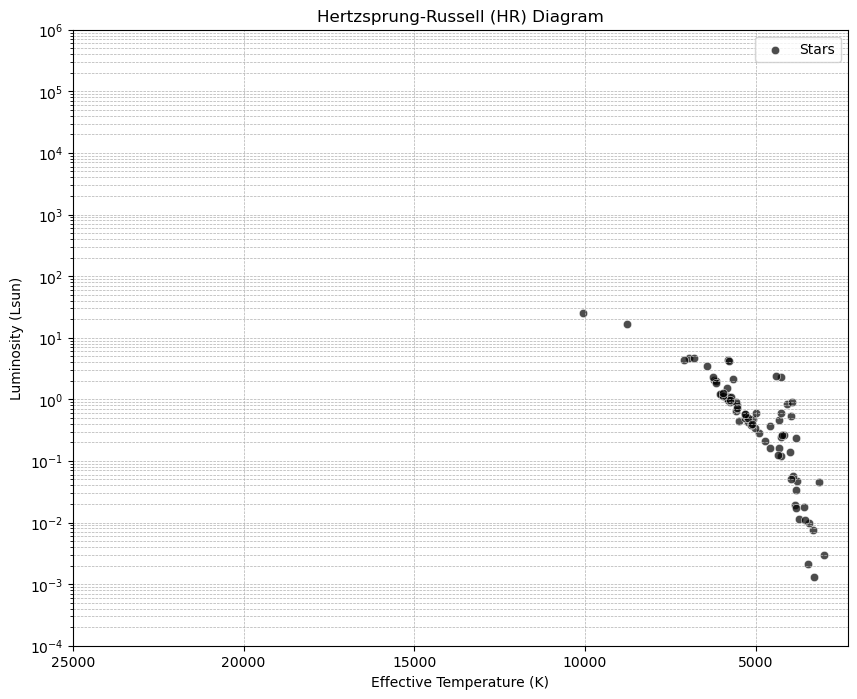

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = r"E:\Petroula Zygogianni\AST5770\data\data\obs_starcat\obs_starcat.csv" 
df = pd.read_csv(data_path)

columns_to_convert = ['Mass', 'Radius', 'Teff', 'L_bol', 'B-V']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=columns_to_convert)

plt.figure(figsize=(10, 8))

sns.scatterplot(x=df['Teff'], y=df['L_bol'], alpha=0.7, color='black', label="Stars")

plt.xlim(25000, 2300)
plt.yscale('log')
plt.ylim(1e-4, 1e6)
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Luminosity (Lsun)")
plt.title("Hertzsprung-Russell (HR) Diagram")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


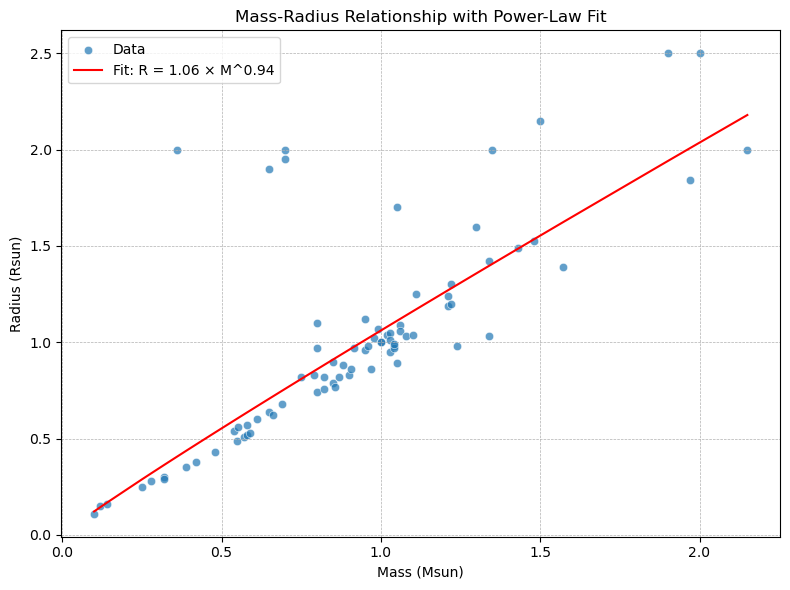

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

data_path = r"E:\Petroula Zygogianni\AST5770\data\data\obs_starcat\obs_starcat.csv"
df = pd.read_csv(data_path)

columns_to_convert = ['Mass', 'Radius', 'Teff', 'L_bol', 'B-V']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=columns_to_convert)

log_mass = np.log10(df['Mass'])
log_radius = np.log10(df['Radius'])

slope, intercept, r_value, p_value, std_err = linregress(log_mass, log_radius)

fitted_log_radius = intercept + slope * log_mass
fitted_radius = 10**fitted_log_radius

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Mass'], y=df['Radius'], alpha=0.7, label='Data')
plt.plot(df['Mass'], fitted_radius, color='red',
         label=f'Fit: R = {10**intercept:.2f} × M^{slope:.2f}')
plt.xlabel("Mass (Msun)")
plt.ylabel("Radius (Rsun)")
plt.title("Mass-Radius Relationship with Power-Law Fit")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

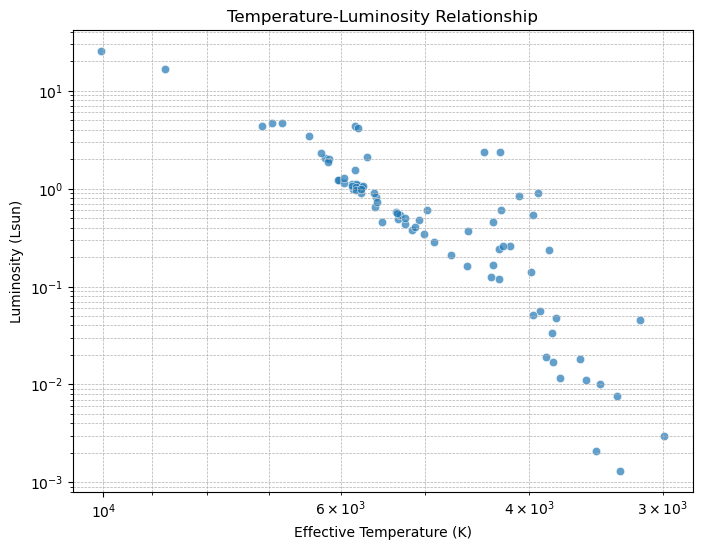

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = r"E:\Petroula Zygogianni\AST5770\data\data\obs_starcat\obs_starcat.csv"
df = pd.read_csv(data_path)

columns_to_convert = ['Mass', 'Radius', 'Teff', 'L_bol', 'B-V']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=columns_to_convert)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Teff'], y=df['L_bol'], alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Luminosity (Lsun)")
plt.title("Temperature-Luminosity Relationship")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.gca().invert_xaxis()

plt.show()

Pearson correlation coefficient: -0.92


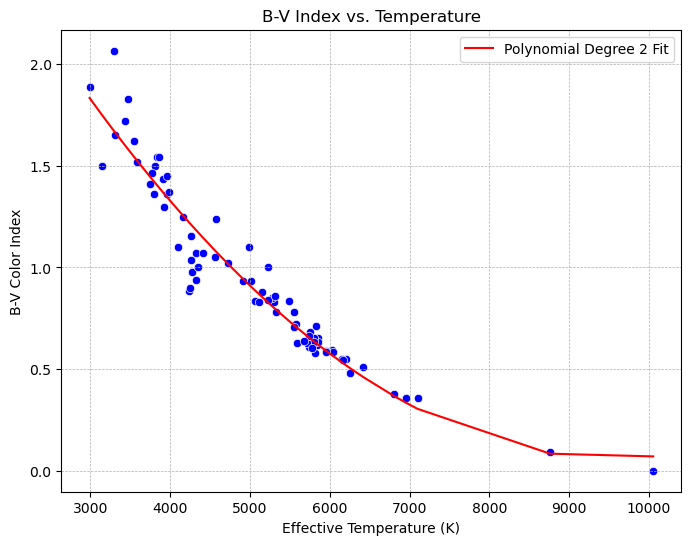

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr


data_path = r"E:\Petroula Zygogianni\AST5770\data\data\obs_starcat\obs_starcat.csv"
df = pd.read_csv(data_path)

columns_to_convert = ['Mass', 'Radius', 'Teff', 'L_bol', 'B-V']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df = df.dropna(subset=columns_to_convert)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Teff'], y=df['B-V'], color='blue')
plt.xlabel("Effective Temperature (K)")
plt.ylabel("B-V Color Index")
plt.title("B-V Index vs. Temperature")
plt.grid(True, linestyle='--', linewidth=0.5)

corr, _ = pearsonr(df['Teff'], df['B-V'])
print(f"Pearson correlation coefficient: {corr:.2f}")

X = df['Teff'].values.reshape(-1, 1)  
y = df['B-V'].values 

degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(np.sort(df['Teff'].values), model.predict(poly.transform(np.sort(df['Teff'].values).reshape(-1, 1))), color='red', label=f'Polynomial Degree {degree} Fit')
plt.legend()

plt.show()



Star: Gliese 1111 (GJ1111)
  Fitted Temperature: 2850.24 K
  Peak Wavelength (λ_max): 1016.41 nm


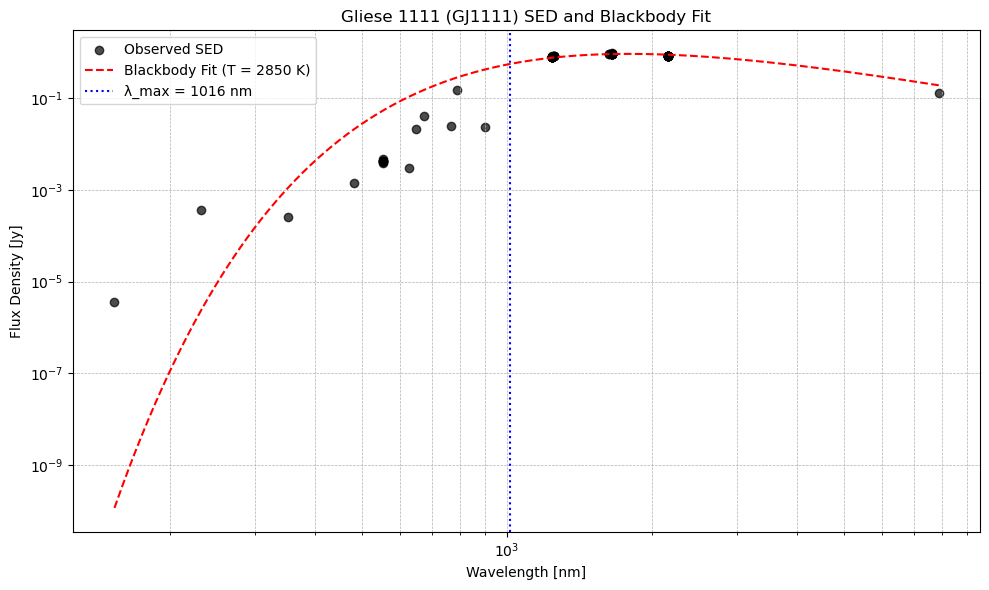


Star: TYC6349-0200-1
  Fitted Temperature: 3471.88 K
  Peak Wavelength (λ_max): 834.42 nm


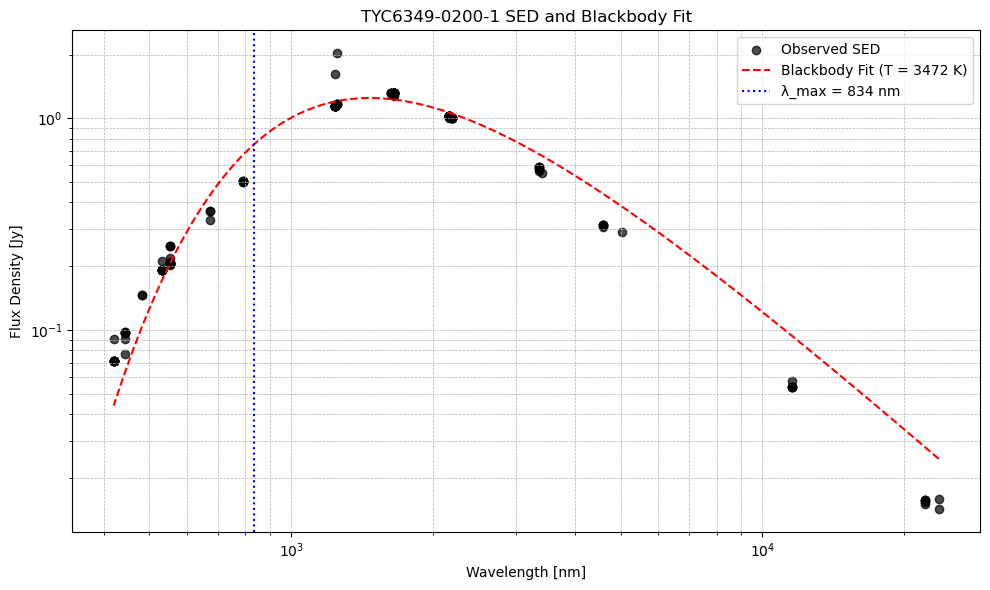


Star: Alpha Centauri A
  Fitted Temperature: 5646.37 K
  Peak Wavelength (λ_max): 513.07 nm


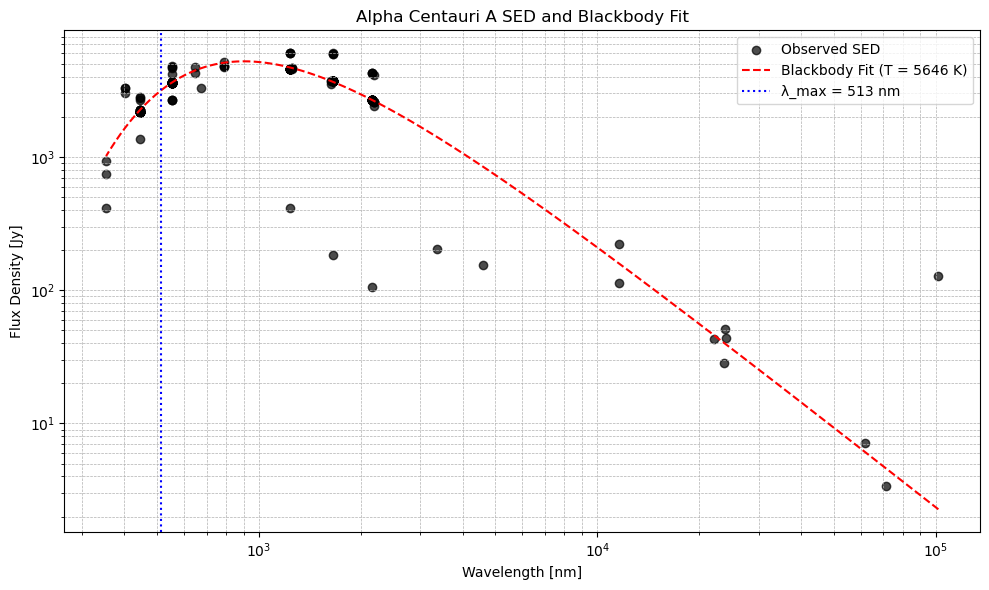


Star: Eta Corvi (η Corvi)
  Fitted Temperature: 7262.33 K
  Peak Wavelength (λ_max): 398.91 nm


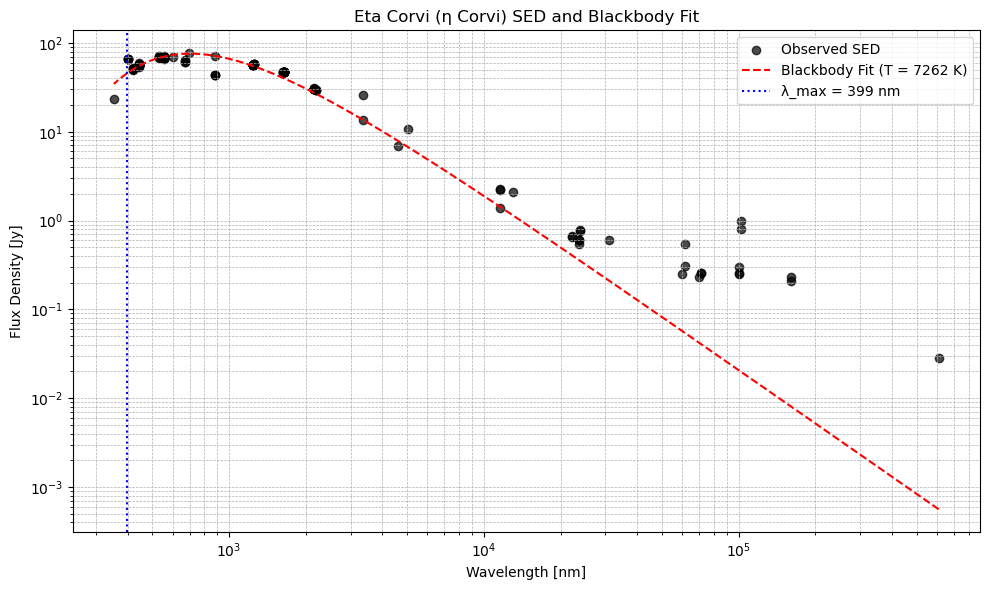


Star: Formalhaut
  Fitted Temperature: 10676.92 K
  Peak Wavelength (λ_max): 271.33 nm


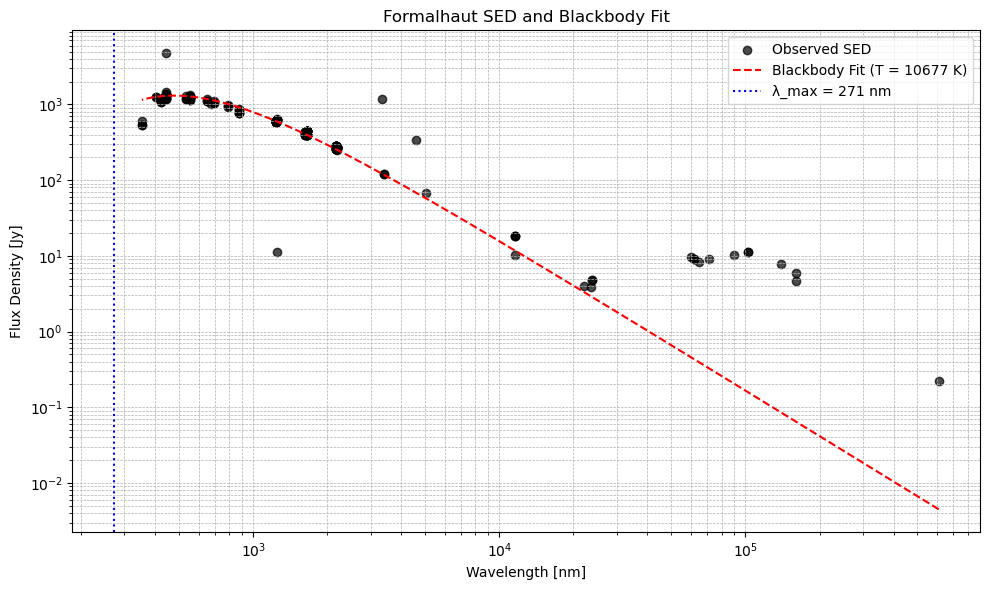

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.votable import parse_single_table
from scipy.optimize import curve_fit
from scipy.constants import h, c, k


def planck_nu(freq, T, scale):
    """Planck function B_ν in W/m²/Hz/sr scaled and converted to Jy"""
    B_nu = (2 * h * freq**3) / (c**2) / (np.exp((h * freq) / (k * T)) - 1)
    return scale * B_nu * 1e26  


def fit_and_plot_star(sed_file, T_eff, star_name):
    
    sed = parse_single_table(sed_file).to_table()

    
    freq = np.array(sed['sed_freq']) * 1e9
    flux = np.array(sed['sed_flux'])

    
    sorted_indices = np.argsort(freq)
    freq = freq[sorted_indices]
    flux = flux[sorted_indices]

    
    initial_guess = [T_eff, 1e-20]
    try:
        popt, _ = curve_fit(planck_nu, freq, flux, p0=initial_guess, maxfev=10000)
    except RuntimeError:
        print(f"Curve fitting failed for {star_name}")
        return

    T_fit, scale_fit = popt

    
    lambda_max_nm = 2.897e6 / T_fit

    
    freq_fit = np.logspace(np.log10(min(freq)), np.log10(max(freq)), 1000)
    flux_fit = planck_nu(freq_fit, T_fit, scale_fit)
    wavelength_fit_nm = (c / freq_fit) * 1e9

    
    wavelength_nm = (c / freq) * 1e9

    
    print(f"\nStar: {star_name}")
    print(f"  Fitted Temperature: {T_fit:.2f} K")
    print(f"  Peak Wavelength (λ_max): {lambda_max_nm:.2f} nm")

    
    plt.figure(figsize=(10, 6))
    plt.scatter(wavelength_nm, flux, color='black', label="Observed SED", alpha=0.7)
    plt.plot(wavelength_fit_nm, flux_fit, color='red', linestyle='--', label=f"Blackbody Fit (T = {T_fit:.0f} K)")
    plt.axvline(lambda_max_nm, color='blue', linestyle='dotted', label=f"λ_max = {lambda_max_nm:.0f} nm")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Wavelength [nm]")
    plt.ylabel("Flux Density [Jy]")
    plt.title(f"{star_name} SED and Blackbody Fit")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


stars = [
    {
        'name': 'Gliese 1111 (GJ1111)',
        'sed_file': r"E:\Petroula Zygogianni\AST5770\data\data\obs_starcat\SED\GJ_1111.vot",
        'T_eff': 3293
    },
    {
        'name': 'TYC6349-0200-1',
        'sed_file': r"E:\Petroula Zygogianni\AST5770\data\data\obs_starcat\SED\TYC6349-0200-1.vot",
        'T_eff': 4270
    },
    {
        'name': 'Alpha Centauri A',
        'sed_file': r"E:\Petroula Zygogianni\AST5770\data\data\obs_starcat\SED\Alpha_Cen_A.vot",
        'T_eff': 5824
    },
    {
        'name': 'Eta Corvi (η Corvi)',
        'sed_file': r"E:\Petroula Zygogianni\AST5770\data\data\obs_starcat\SED\eta_Corvi.vot",
        'T_eff': 6805
    },
    {
        'name': 'Formalhaut',
        'sed_file': r"E:\Petroula Zygogianni\AST5770\data\data\obs_starcat\SED\Fomalhaut.vot",
        'T_eff': 8760
    }
    
]


for star in stars:
    fit_and_plot_star(star['sed_file'], star['T_eff'], star['name'])
